In [7]:
import os
import time
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor, plot_tree

# import helperfunctions
from helperfunctions import fun_load_file, fun_preprocessing, fun_split_X_y
from helperfunctions import fun_convert_time, fun_fit_gridsearch_time
from helperfunctions import fun_train_score, fun_test_score, fun_best_model
from helperfunctions import plot_feature_importances

# start time count and load data
start_script = time.time()
data = fun_load_file(path='01_data\\01_TSP', name='combined_train_instances_dennis.xlsx')
train_data = fun_preprocessing(data)
X, y = fun_split_X_y(train_data)

# create a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# save number of features and train sizes
n_features = X_train.shape[1]
train_size = f'{int(np.round(100 * len(X_train)/len(X)))} %'

# **Decision Trees**

**Randomized Grid Search**

In [8]:
# randomized grid search cross validation
param_distributions = {'max_depth': range(10, 50),
                       'max_leaf_nodes': range(1400, 1800),
                       'min_samples_leaf': range(1, 20),
                       'min_impurity_decrease': uniform(0, 0.005)}

random_grid_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_distributions, cv=5,
                                        n_iter=200, scoring='neg_mean_absolute_percentage_error', 
                                        verbose=False, n_jobs=-1, random_state=0)
fit_time = fun_fit_gridsearch_time(random_grid_search, X_train, y_train)

# view results of grid search cross validation
MAPE, RMSE = fun_best_model(random_grid_search, X_train, y_train, view_results_df=False, return_scores=True)

# save results to dictionary
results_dict = {}
results_dict['Decision Tree (RGS)'] = {'MAPE': MAPE, 'RMSE': RMSE, 'Fit gird searach time': fit_time, 'Train size': train_size}

  CV MAPE train data: 10.293099999999999 %
  CV RMSE train data: 2.5883

  Best model / parameter combination:
   {'max_depth': 38, 'max_leaf_nodes': 1721, 'min_impurity_decrease': 0.0007881613786832881, 'min_samples_leaf': 19}


**Grid Search**

In [9]:
# grid search cross validation
param_grid = {'max_depth': [15, 20, 25, 30, 35, 40],
              'max_leaf_nodes': [1600, 1700, 1800, 1900],
              'min_samples_leaf': [5, 10, 15, 20],
              'min_impurity_decrease': [0, 0.0001, 0.001, 0.002]}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv=5,
                           scoring='neg_mean_absolute_percentage_error', 
                           verbose=True, n_jobs=-1)
fit_time = fun_fit_gridsearch_time(grid_search, X_train, y_train)

# view results of grid search cross validation
MAPE, RMSE = fun_best_model(grid_search, X_train, y_train, view_results_df=False, return_scores=True)

# save results to dictionary
results_dict['Decision Tree (GS)'] = {'MAPE': MAPE, 'RMSE': RMSE, 'Fit gird searach time': fit_time, 'Train size': train_size}

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
  CV MAPE train data: 10.147499999999999 %
  CV RMSE train data: 2.5681

  Best model / parameter combination:
   {'max_depth': 15, 'max_leaf_nodes': 1900, 'min_impurity_decrease': 0, 'min_samples_leaf': 20}


**Plots**

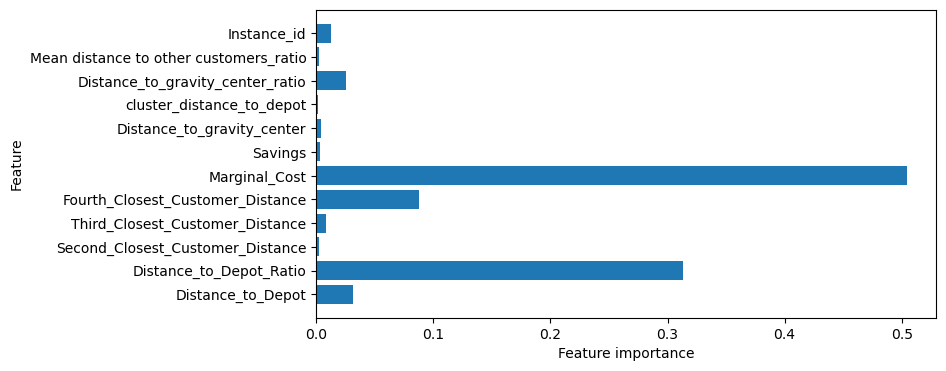

In [10]:
# view feature importances of best estimator
plot_feature_importances(grid_search.best_estimator_, X_train, all_features=False)

In [11]:
# visualize the decision tree
#plt.figure(figsize=(18, 5))
#plot_tree(grid_search.best_estimator_, filled=True)
#plt.show()

# **Compare Results**

In [12]:
display(pd.DataFrame(results_dict).sort_values(by='MAPE', axis=1))
print('Total script computation time:', fun_convert_time(start=start_script, end=time.time()))

,Decision Tree (GS),Decision Tree (RGS)
MAPE,10.1475,10.2931
RMSE,2.5681,2.5883
Fit gird searach time,"17 min, 41 sec","9 min, 42 sec"
Train size,75 %,75 %


Total script computation time: 28 min, 11 sec
